In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Reload dataset (with no header to prevent misinterpretation)
file_path = "/content/drive/My Drive/blog-gender-dataset.xlsx"
df = pd.read_excel(file_path, header=None)  # Read without using the first row as header

# Rename the first two columns
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ["Text", "Gender"]  # Assign correct column names

# Drop rows with missing values
df = df.dropna()

# Display cleaned dataset info and first few rows
print("Cleaned Dataset Info:")
print(df.info())

print("\nFirst 5 Rows of Cleaned Dataset:")
df.head()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3226 entries, 0 to 3231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3226 non-null   object
 1   Gender  3226 non-null   object
dtypes: object(2)
memory usage: 75.6+ KB
None

First 5 Rows of Cleaned Dataset:


,Text,Gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values in Dataset:")
print(missing_values)

# Print the total number of entries
print(f"Total number of entries in the dataset: {len(df)}")

Missing Values in Dataset:
Text      0
Gender    0
dtype: int64
Total number of entries in the dataset: 3226


In [4]:
print("Unique values in Gender column:")
print(df["Gender"].unique())

Unique values in Gender column:
['M' 'F' ' M' ' F' 'F ' ' M ' 'm' 'f']


In [5]:
# Standardize the Gender column (strip spaces & convert to uppercase)
df["Gender"] = df["Gender"].str.strip().str.upper()

# Check unique values again to confirm the fix
print("Cleaned Unique values in Gender column:")
print(df["Gender"].unique())

Cleaned Unique values in Gender column:
['M' 'F']


<ipython-input-5-4be5f15bcbb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].str.strip().str.upper()


In [6]:
print("Gender distribution:")
print(df["Gender"].value_counts())

Gender distribution:
Gender
M    1678
F    1548
Name: count, dtype: int64


In [7]:
# Find duplicate rows based on 'Text' column
duplicates = df[df.duplicated(subset=['Text'])]

print(f"Number of duplicate entries: {len(duplicates)}")
print("Sample duplicate entries:")
duplicates.head()

Number of duplicate entries: 11
Sample duplicate entries:


,Text,Gender
1445,Suppose you want to buy a cart horse. Of cour...,F
1446,Two LA Landmarks: Pacific Dining Car and Lang...,F
1556,Man...this car rocks! Push button start...auto...,M
1743,I've found out that my best friend plans to co...,F
1780,Real school starts on Wednesday. I am excited ...,F


In [8]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Text'], keep='first')

print(f"Number of entries after removing duplicates: {len(df)}")

Number of entries after removing duplicates: 3215


<ipython-input-9-314d955af40c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="viridis")


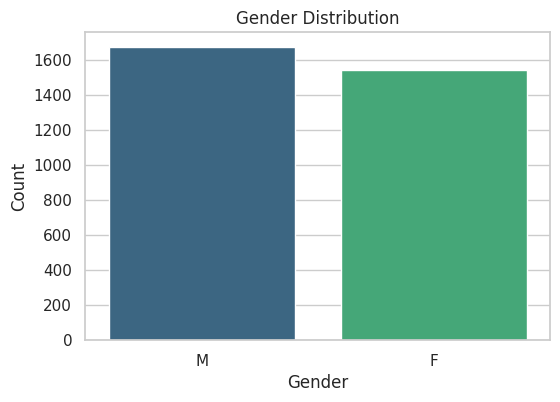

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Gender"], palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#Basic Text Preprocessing and Feature Extraction

In [10]:
df.head()

,Text,Gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenization
    words = word_tokenize(text)
    # Removing stop words and lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back to a single string
    return " ".join(words)

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows after preprocessing
print("Sample preprocessed text:")
print(df[['Text', 'Processed_Text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Sample preprocessed text:
                                                Text  \
0   Long time no see. Like always I was rewriting...   
1   Guest Demo: Eric Iverson’s Itty Bitty Search\...   
2  Who moved my Cheese???   The world has been de...   
3   Yesterday I attended a biweekly meeting of an...   
4   Liam is nothing like Natalie. Natalie never w...   

                                      Processed_Text  
0  long time see like always rewriting scratch co...  
1  guest demo eric iverson ’ itty bitty search fe...  
2  moved cheese world developing area create diff...  
3  yesterday attended biweekly meeting informal u...  
4  liam nothing like natalie natalie never went d...  


In [12]:
df.head()

,Text,Gender,Processed_Text
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson ’ itty bitty search fe...
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing area create diff...
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...


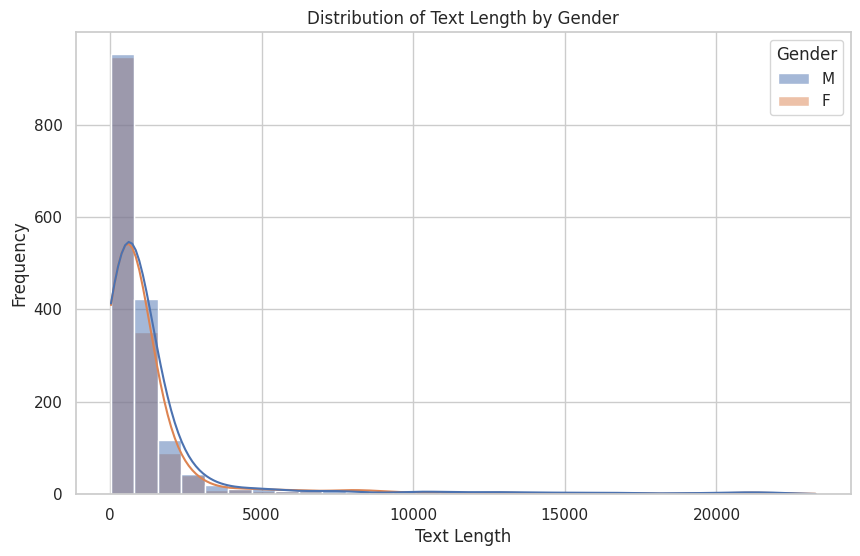

Text Length Statistics by Gender:
         count         mean          std   min     25%    50%     75%      max
Gender                                                                        
F       1542.0  1423.934501  2835.885617  79.0  350.25  650.0  1144.0  23265.0
M       1673.0  1553.176928  3072.538924  37.0  365.00  684.0  1252.0  22675.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate text length and add as a new column
df['Text_Length'] = df['Processed_Text'].apply(len)

# Plotting the distribution of text length by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Text_Length', hue='Gender', bins=30, kde=True)
plt.title("Distribution of Text Length by Gender")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Print basic statistics of text length by gender
print("Text Length Statistics by Gender:")
print(df.groupby("Gender")["Text_Length"].describe())

In [14]:
df.head()

,Text,Gender,Processed_Text,Text_Length
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,648
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson ’ itty bitty search fe...,1289
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing area create diff...,3656
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,778
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,634


In [15]:
from collections import Counter

def get_top_words(text_series, top_n=20):
    # Join all cleaned texts into one large string
    all_words = ' '.join(text_series).split()
    # Get the most common words
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Get top 20 words for each gender
male_top_words = get_top_words(df[df['Gender'] == 'M']['Processed_Text'])
female_top_words = get_top_words(df[df['Gender'] == 'F']['Processed_Text'])

print("Top 20 Words Used by Males:")
print(male_top_words)

print("\nTop 20 Words Used by Females:")
print(female_top_words)

Top 20 Words Used by Males:
[('’', 2789), ('one', 2488), ('like', 2005), ('time', 1907), ('get', 1484), ('would', 1449), ('people', 1230), ('u', 1213), ('thing', 1204), ('year', 1204), ('new', 1156), ('know', 1153), ('day', 1148), ('make', 1143), ('good', 1078), ('way', 1043), ('also', 1035), ('im', 1034), ('see', 1018), ('well', 1002)]

Top 20 Words Used by Females:
[('’', 2415), ('one', 2340), ('like', 2031), ('time', 2008), ('get', 1500), ('day', 1468), ('im', 1425), ('know', 1374), ('would', 1303), ('year', 1281), ('thing', 1223), ('make', 1153), ('really', 1122), ('u', 1093), ('people', 1067), ('new', 1030), ('think', 998), ('way', 979), ('love', 973), ('back', 960)]


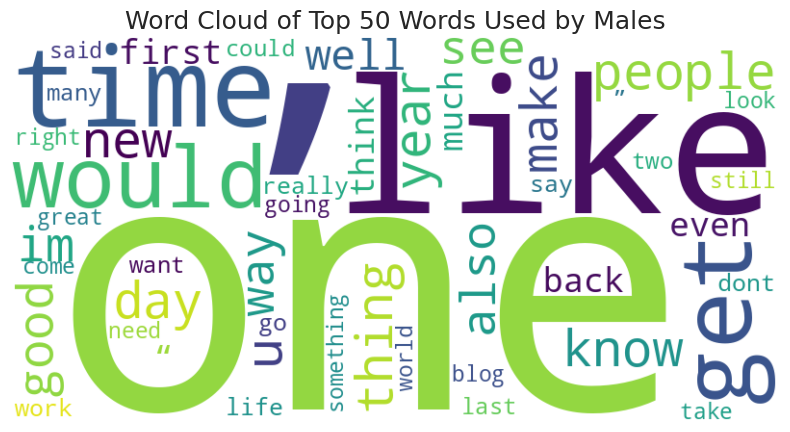

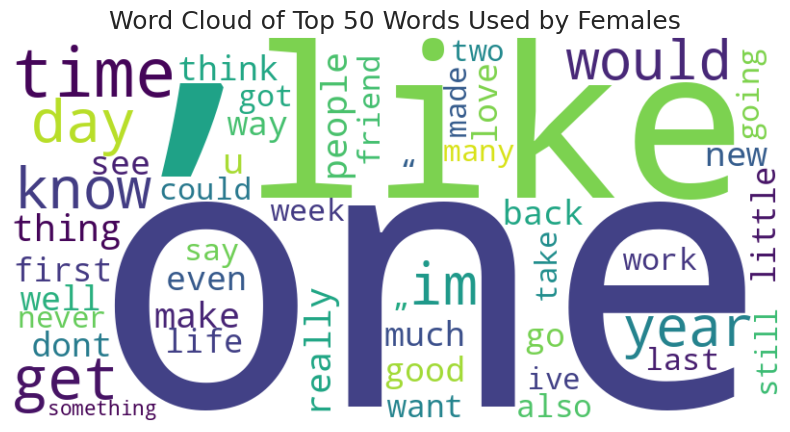

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

# Generate word clouds for male and female texts
male_top_words = dict(get_top_words(df[df['Gender'] == 'M']['Processed_Text'], top_n=50))
female_top_words = dict(get_top_words(df[df['Gender'] == 'F']['Processed_Text'], top_n=50))

# Plot the word clouds
plot_wordcloud(male_top_words, "Word Cloud of Top 50 Words Used by Males")
plot_wordcloud(female_top_words, "Word Cloud of Top 50 Words Used by Females")

#Statistical Comparison of Word Usage

In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

def word_frequency_by_gender(df, gender):
    # Combine all texts of the specified gender
    texts = ' '.join(df[df['Gender'] == gender]['Processed_Text']).split()
    # Count word occurrences
    word_counts = pd.Series(texts).value_counts()
    return word_counts

# Get word frequencies for each gender
male_freq = word_frequency_by_gender(df, 'M')
female_freq = word_frequency_by_gender(df, 'F')

# Combine frequencies into a single DataFrame
word_stats = pd.DataFrame({'Male': male_freq, 'Female': female_freq}).fillna(0)

# Perform Chi-Square Test to find significant differences
word_stats['Chi2'], word_stats['p_value'] = zip(*[
    chi2_contingency([[row['Male'], row['Female']],
                      [word_stats['Male'].sum() - row['Male'], word_stats['Female'].sum() - row['Female']]])[:2]
    for _, row in word_stats.iterrows()
])

# Sort by the smallest p-value to find most discriminative words
significant_words = word_stats.sort_values('p_value').head(20)

print("Top 20 Words with Significant Gender Difference:")
print(significant_words[['Male', 'Female', 'Chi2', 'p_value']])

Top 20 Words with Significant Gender Difference:
           Male  Female        Chi2       p_value
game      628.0   141.0  243.802557  5.829146e-55
love      511.0   973.0  217.269991  3.563565e-49
le          7.0   198.0  205.043292  1.657064e-46
lunch      38.0   214.0  148.299354  4.080319e-34
little    533.0   889.0  146.894156  8.276932e-34
im       1034.0  1425.0  130.313966  3.498286e-30
user      194.0    18.0  121.434439  3.069800e-28
player    248.0    49.0  106.083155  7.070511e-25
husband    43.0   181.0  104.817519  1.339181e-24
sudan       0.0    92.0  103.857019  2.174561e-24
baby       70.0   221.0  100.504226  1.181446e-23
day      1148.0  1468.0   97.860754  4.488625e-23
team      357.0   110.0   97.712752  4.836972e-23
film      342.0   104.0   95.217454  1.705797e-22
school    318.0   541.0   93.600374  3.861146e-22
wedding     7.0   100.0   93.112020  4.941670e-22
darfur      0.0    82.0   92.335500  7.316008e-22
card      298.0    84.0   91.084931  1.376359e-21
d

In [18]:
df.head()

,Text,Gender,Processed_Text,Text_Length
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,648
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson ’ itty bitty search fe...,1289
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing area create diff...,3656
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,778
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,634


#Linguistic Feature Extraction

In [19]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

# Download necessary resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

def extract_linguistic_features(text):
    # Tokenize words
    tokens = word_tokenize(text)

    # POS tagging
    pos_tags = pos_tag(tokens)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)

    # Sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    # Feature dictionary
    features = {
        'noun_count': pos_counts['NN'] + pos_counts['NNS'],
        'verb_count': pos_counts['VB'] + pos_counts['VBD'] + pos_counts['VBG'] + pos_counts['VBN'] + pos_counts['VBP'] + pos_counts['VBZ'],
        'adj_count': pos_counts['JJ'] + pos_counts['JJR'] + pos_counts['JJS'],
        'adv_count': pos_counts['RB'] + pos_counts['RBR'] + pos_counts['RBS'],
        'sentiment_polarity': sentiment_polarity,
        'sentiment_subjectivity': sentiment_subjectivity,
        'word_count': len(tokens)
    }
    return features

# Apply the feature extraction function to each text
linguistic_features = df['Processed_Text'].apply(extract_linguistic_features).apply(pd.Series)

# Concatenate the extracted features with the original DataFrame
df = pd.concat([df, linguistic_features], axis=1)

print("Sample of Extracted Linguistic Features:")
print(df[['Processed_Text', 'noun_count', 'verb_count', 'adj_count', 'adv_count', 'sentiment_polarity', 'sentiment_subjectivity', 'word_count']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Sample of Extracted Linguistic Features:
                                      Processed_Text  noun_count  verb_count  \
0  long time see like always rewriting scratch co...        30.0        24.0   
1  guest demo eric iverson ’ itty bitty search fe...        85.0        34.0   
2  moved cheese world developing area create diff...       218.0       155.0   
3  yesterday attended biweekly meeting informal u...        45.0        26.0   
4  liam nothing like natalie natalie never went d...        40.0        19.0   

   adj_count  adv_count  sentiment_polarity  sentiment_subjectivity  \
0       17.0       12.0           -0.116667                0.503741   
1       37.0        5.0            0.113756                0.394475   
2      140.0       26.0            0.133776                0.531543   
3       23.0        6.0            0.269762                0.511190   
4       18.0       13.0            0.327885                0.552137   

   word_count  
0        89.0  
1       185.0  
2  

In [20]:
df.head()

,Text,Gender,Processed_Text,Text_Length,noun_count,verb_count,adj_count,adv_count,sentiment_polarity,sentiment_subjectivity,word_count
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...,648,30.0,24.0,17.0,12.0,-0.116667,0.503741,89.0
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson ’ itty bitty search fe...,1289,85.0,34.0,37.0,5.0,0.113756,0.394475,185.0
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing area create diff...,3656,218.0,155.0,140.0,26.0,0.133776,0.531543,568.0
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...,778,45.0,26.0,23.0,6.0,0.269762,0.511190,106.0
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...,634,40.0,19.0,18.0,13.0,0.327885,0.552137,102.0


#Feature Extraction

#Traditional NLP Features

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to top 5000 for efficiency

# Fit and transform the preprocessed text
tfidf_features = tfidf_vectorizer.fit_transform(df['Processed_Text']).toarray()

print(f"Shape of TF-IDF features: {tfidf_features.shape}")

# Convert to DataFrame for better inspection
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of TF-IDF features
print("Sample TF-IDF features:")
print(tfidf_df.head())

Shape of TF-IDF features: (3215, 5000)
Sample TF-IDF features:
         10       100  1000  10000  101  10th   11   12   13   14  ...  youth  \
0  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
1  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
2  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
3  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   
4  0.083461  0.101674   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...    0.0   

   youtube  youve   yr  zealand  zero  zombie  zone  zoo  zune  
0      0.0    0.0  0.0      0.0   0.0     0.0   0.0  0.0   0.0  
1      0.0    0.0  0.0      0.0   0.0     0.0   0.0  0.0   0.0  
2      0.0    0.0  0.0      0.0   0.0     0.0   0.0  0.0   0.0  
3      0.0    0.0  0.0      0.0   0.0     0.0   0.0  0.0   0.0  
4      0.0    0.0  0.0      0.0   0.0     0.0   0.0  0.0   0.0  

[5 rows x 5000 columns]


In [22]:
tfidf_df.head()

,10,100,1000,10000,101,10th,11,12,13,14,...,youth,youtube,youve,yr,zealand,zero,zombie,zone,zoo,zune
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.083461,0.101674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng')

# Function to extract POS tag distribution
def pos_tag_features(text):
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)
    pos_counts = {}
    for word, tag in tags:
        pos_counts[tag] = pos_counts.get(tag, 0) + 1
    # Normalize by the length of the text
    total_count = len(tokens)
    for tag in pos_counts:
        pos_counts[tag] /= total_count
    return pos_counts

# Extract POS features for each text
pos_features = df['Processed_Text'].apply(pos_tag_features)

# Convert list of dictionaries to DataFrame
pos_df = pd.DataFrame(pos_features.tolist()).fillna(0)

print("Sample POS Tagging features:")
print(pos_df.head())

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Sample POS Tagging features:
         JJ        NN       VBP        IN        RB       VBG        VB  \
0  0.191011  0.325843  0.067416  0.033708  0.134831  0.089888  0.044944   
1  0.194595  0.454054  0.021622  0.010811  0.027027  0.054054  0.005405   
2  0.232394  0.352113  0.051056  0.017606  0.045775  0.063380  0.040493   
3  0.216981  0.396226  0.009434  0.037736  0.056604  0.066038  0.028302   
4  0.156863  0.372549  0.039216  0.029412  0.117647  0.029412  0.019608   

        PRP        CD       VBZ  ...  WRB   UH    $   EX  PRP$  POS  NNPS  \
0  0.011236  0.022472  0.011236  ...  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1  0.010811  0.027027  0.005405  ...  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2  0.001761  0.014085  0.001761  ...  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3  0.000000  0.009434  0.000000  ...  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4  0.000000  0.058824  0.000000  ...  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

    ''  PDT  SYM  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  


In [24]:
pos_df.head()

,JJ,NN,VBP,IN,RB,VBG,VB,PRP,CD,VBZ,...,WRB,UH,$,EX,PRP$,POS,NNPS,'',PDT,SYM
0,0.191011,0.325843,0.067416,0.033708,0.134831,0.089888,0.044944,0.011236,0.022472,0.011236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.194595,0.454054,0.021622,0.010811,0.027027,0.054054,0.005405,0.010811,0.027027,0.005405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.232394,0.352113,0.051056,0.017606,0.045775,0.063380,0.040493,0.001761,0.014085,0.001761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.216981,0.396226,0.009434,0.037736,0.056604,0.066038,0.028302,0.000000,0.009434,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.156863,0.372549,0.039216,0.029412,0.117647,0.029412,0.019608,0.000000,0.058824,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Combine TF-IDF and POS features into one DataFrame
combined_features = pd.concat([tfidf_df, pos_df], axis=1)

print(f"Shape of combined features: {combined_features.shape}")
print("Sample combined features:")
print(combined_features.head())

Shape of combined features: (3215, 5037)
Sample combined features:
         10       100  1000  10000  101  10th   11   12   13   14  ...  WRB  \
0  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
2  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
3  0.000000  0.000000   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   
4  0.083461  0.101674   0.0    0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...  0.0   

    UH    $   EX  PRP$  POS  NNPS   ''  PDT  SYM  
0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  

[5 rows x 5037 columns]


In [26]:
combined_features.head()

,10,100,1000,10000,101,10th,11,12,13,14,...,WRB,UH,$,EX,PRP$,POS,NNPS,'',PDT,SYM
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.083461,0.101674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Baseline Model Building

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the target and feature set
X = combined_features
y = df['Gender'].map({'M': 0, 'F': 1})  # Encode Gender as binary (M=0, F=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model performance
model_performance = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
model_performance['Logistic Regression'] = accuracy_score(y_test, log_reg_pred)

# SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
model_performance['SVM'] = accuracy_score(y_test, svm_pred)

# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
model_performance['Random Forest'] = accuracy_score(y_test, rf_pred)

# Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
model_performance['Naive Bayes'] = accuracy_score(y_test, nb_pred)

# Print model performance
print("Model Performance:")
for model, accuracy in model_performance.items():
    print(f"{model}: {accuracy:.4f}")

# Detailed classification report for the best model
best_model = max(model_performance, key=model_performance.get)
print(f"\nBest Model: {best_model}")

if best_model == 'Logistic Regression':
    y_pred = log_reg_pred
elif best_model == 'SVM':
    y_pred = svm_pred
elif best_model == 'Random Forest':
    y_pred = rf_pred
else:
    y_pred = nb_pred

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Performance:
Logistic Regression: 0.7263
SVM: 0.7418
Random Forest: 0.7014
Naive Bayes: 0.7201

Best Model: SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       349
           1       0.73      0.69      0.71       294

    accuracy                           0.74       643
   macro avg       0.74      0.74      0.74       643
weighted avg       0.74      0.74      0.74       643


Confusion Matrix:
[[273  76]
 [ 90 204]]


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Dictionary to store predictions of each model
model_predictions = {
    'Logistic Regression': log_reg_pred,
    'SVM': svm_pred,
    'Random Forest': rf_pred,
    'Naive Bayes': nb_pred
}

print("Detailed Classification Reports for All Models:\n")
for model_name, predictions in model_predictions.items():
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("-" * 50)

Detailed Classification Reports for All Models:

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       349
           1       0.71      0.69      0.70       294

    accuracy                           0.73       643
   macro avg       0.72      0.72      0.72       643
weighted avg       0.73      0.73      0.73       643

Confusion Matrix:
[[265  84]
 [ 92 202]]
--------------------------------------------------
Model: SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       349
           1       0.73      0.69      0.71       294

    accuracy                           0.74       643
   macro avg       0.74      0.74      0.74       643
weighted avg       0.74      0.74      0.74       643

Confusion Matrix:
[[273  76]
 [ 90 204]]
--------------------------------------------------
Model: Random Forest
Classifi

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary to store predictions of each model
model_predictions = {
    'Logistic Regression': log_reg_pred,
    'SVM': svm_pred,
    'Random Forest': rf_pred,
    'Naive Bayes': nb_pred
}

# Initialize an empty list to store performance metrics
performance_data = []

print("Detailed Classification Reports for All Models:\n")
for model_name, predictions in model_predictions.items():
    # Generate classification report as a dictionary
    report = classification_report(y_test, predictions, output_dict=True)
    accuracy = accuracy_score(y_test, predictions)

    # Extract weighted average metrics
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    # Append model performance to the list
    performance_data.append([model_name, accuracy, precision, recall, f1_score])

# Create a DataFrame from the collected performance data
performance_df = pd.DataFrame(performance_data, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the consolidated performance table
print("\nConsolidated Model Performance Table:")
print(performance_df.round(4))

Detailed Classification Reports for All Models:


Consolidated Model Performance Table:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.7263     0.7258  0.7263    0.7259
1                  SVM    0.7418     0.7413  0.7418    0.7412
2        Random Forest    0.7014     0.7011  0.7014    0.7012
3          Naive Bayes    0.7201     0.7260  0.7201    0.7205


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"PCA-transformed shape: {X_pca.shape}")

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Dictionary to store model performance
pca_model_performance = {}

# Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression(max_iter=200)
log_reg_pca.fit(X_train_pca, y_train)
log_reg_pca_pred = log_reg_pca.predict(X_test_pca)
pca_model_performance['Logistic Regression (PCA)'] = accuracy_score(y_test, log_reg_pca_pred)

# SVM on PCA-transformed data
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
svm_pca_pred = svm_pca.predict(X_test_pca)
pca_model_performance['SVM (PCA)'] = accuracy_score(y_test, svm_pca_pred)

# Random Forest on PCA-transformed data
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)
rf_pca_pred = rf_pca.predict(X_test_pca)
pca_model_performance['Random Forest (PCA)'] = accuracy_score(y_test, rf_pca_pred)

# Gaussian Naive Bayes on PCA-transformed data
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)
gnb_pca_pred = gnb_pca.predict(X_test_pca)
pca_model_performance['Gaussian Naive Bayes (PCA)'] = accuracy_score(y_test, gnb_pca_pred)

# Print model performance
print("\nModel Performance after PCA:")
for model, accuracy in pca_model_performance.items():
    print(f"{model}: {accuracy:.4f}")

# Classification reports for each model
print("\nClassification Reports for PCA-based Models:")
for model_name, pred in zip(pca_model_performance.keys(), [log_reg_pca_pred, svm_pca_pred, rf_pca_pred, gnb_pca_pred]):
    print(f"\nModel: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, pred))
    print("-" * 50)

Original shape: (3215, 5037)
PCA-transformed shape: (3215, 2310)

Model Performance after PCA:
Logistic Regression (PCA): 0.6128
SVM (PCA): 0.7061
Random Forest (PCA): 0.5879
Gaussian Naive Bayes (PCA): 0.5537

Classification Reports for PCA-based Models:

Model: Logistic Regression (PCA)
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       349
           1       0.57      0.60      0.59       294

    accuracy                           0.61       643
   macro avg       0.61      0.61      0.61       643
weighted avg       0.61      0.61      0.61       643

--------------------------------------------------

Model: SVM (PCA)
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       349
           1       0.69      0.64      0.67       294

    accuracy                           0.71       643
   macro avg       0.70      0.70      0.70       